### 1. 데이터 수집 - 공공데이터포털 - 건강검진정보
- 건강검진 데이터를 공공데이터포털에서 수집합니다.  
https://www.data.go.kr/dataset/15007122/fileData.do  
- 데이터 분석을 위해서 csv 파일에서 신장, 체중, 허리둘레 부분만 남기고 삭제했습니다.
- 판다스로 데이터를 불러오겠습니다.

In [1]:
import pandas as pd

df = pd.read_csv('2018_키_몸무게_허리둘레.csv')
df

,신장(5Cm단위),체중(5Kg단위),허리둘레
0,160,50,61.4
1,155,60,71.0
2,175,65,74.5
3,155,50,60.6
4,170,85,94.0
...,...,...,...
999995,145,50,95.0
999996,155,50,80.8
999997,150,50,82.0
999998,145,45,73.0


- 데이터가 무력 100만건이나 있네요!  
- 일단 신장과 체중 데이터만 불러와보겠습니다.

### 2. 데이터 살펴보기  
- 데이터를 본격적으로 살펴보겠습니다.
- 신장과 체중만 따로 다시 저장해보겠습니다.

In [2]:
df = df[['신장(5Cm단위)','체중(5Kg단위)']]
df

,신장(5Cm단위),체중(5Kg단위)
0,160,50
1,155,60
2,175,65
3,155,50
4,170,85
...,...,...
999995,145,50
999996,155,50
999997,150,50
999998,145,45


- 각각의 데이터를 x, y로 저장합니다.

In [3]:
x = df['신장(5Cm단위)']
y = df['체중(5Kg단위)']

- 모양을 살펴보니 100만개씩의 데이터가 저장된 것을 확인할 수 있습니다.

In [4]:
x.shape

(1000000,)

In [5]:
y.shape

(1000000,)

- 키(x)와 몸무게(y) 사이의 상관관계를 보겠습니다.

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

- 그런데 이게 왠일입니까.. 데이터가 5씩 간격을 두고 저장되어 있어서 우리가 원하는 분석을 하기에 조금 적합하지 않습니다.
- 그래서 이번에는 다른 데이터를 살펴보았는데 국방부 신체검사 데이터는 소수점 단위로 있습니다.
- 남녀 골고루 분석하는게 어렵지만 그래도 신체검사 데이터로 프로젝트를 이어가겠습니다.

### 1. 데이터 수집 - 국방부 공공 데이터
- 국방부에서 제공하는 신체검사 데이터를 수집합니다.  
http://opendata.mnd.go.kr/openinf/sheetview2.jsp?infId=OA-9425
- 판다스로 데이터를 불러오겠습니다.
- 인코딩 문제가 있어서 인코딩 파라미터를 cp949로 주었습니다.

In [7]:
import pandas as pd

df = pd.read_csv('신검데이터.csv', encoding='cp949')
df

C:\Users\greatsong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...,...,...
167978,167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg
167979,167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg
167980,167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg
167981,167982,20170131,85.3 cm,86.8 cm,173.6 cm,75.9 cm (29.9 in),76.6 cm,57.6 cm,24.3 cm,57.4 kg


- cm, kg 등의 단위가 붙어있는 경우가 있어서 삭제한 버전을 다시 만들었습니다.
- 수정된 데이터를 다시 불러옵니다.

In [8]:
import pandas as pd

df = pd.read_csv('신검데이터m.csv')
df

C:\Users\greatsong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...,...,...
167978,167979,20170131,100.6,86.4,173.2,86.7 (34.1 in),77.1,56.9,27.1,73.7
167979,167980,20170131,97.9,82.7,166.3,90.5 (35.6 in),73.4,61.5,28.8,70.7
167980,167981,20170131,97.9,87.2,175.2,94.3 (37.1 in),83.1,57.1,27.6,78.7
167981,167982,20170131,85.3,86.8,173.6,75.9 (29.9 in),76.6,57.6,24.3,57.4


### 2. 데이터 살펴보기  
- 데이터를 살펴보겠습니다.
- 키를 x, 몸무게를 y에 저장합니다.

In [9]:
x = df['신장 센티미터']
y = df['몸무게 킬로그램']

- 스캐터 함수로 상관관계를 살펴보겠습니다.

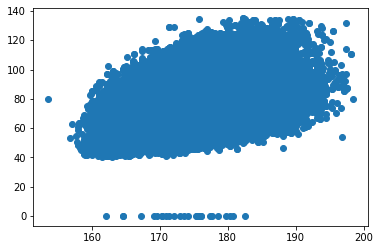

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

- y축이 몸무게인데 0인 값들이 보이는 것 같습니다.
- 확인해보겠습니다.

In [11]:
df[df['몸무게 킬로그램'] < 10]

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
149764,149765,20160923,91.1,83.9,167.2,81.2 (32.0 in),73.8,56.5,24.9,0.0
149781,149782,20160923,100.1,81.1,162.0,58.9 (23.2 in),71.2,58.3,9.8,0.0
149789,149790,20160923,88.1,90.2,179.7,74.5 (29.4 in),79.4,3998.0,27.4,0.0
149792,149793,20160923,88.6,88.8,177.7,78.1 (30.8 in),78.2,55.0,25.3,0.0
149796,149797,20160923,88.8,85.7,171.3,79.1 (31.1 in),75.4,55.0,25.6,0.0
149798,149799,20160923,86.7,87.8,175.8,71.6 (28.2 in),77.4,56.7,26.8,0.0
149799,149800,20160923,74.9,84.1,169.1,119.7 (47.1 in),74.5,55.2,1.0,0.0
149800,149801,20160923,101.3,85.2,169.6,94.7 (37.3 in),74.8,56.6,26.1,0.0
149801,149802,20160923,93.1,90.5,180.3,85.0 (33.5 in),79.6,54.8,26.5,0.0
149802,149803,20160923,99.0,88.0,176.0,86.7 (34.1 in),77.4,57.3,25.6,0.0


- 진짜 0인 값들이 꽤 있습니다.
- 전체 데이터가 17만건 가까이 되니까 몸무게가 0인 데이터를 삭제하겠습니다.

In [12]:
idx = df[df['몸무게 킬로그램'] == 0.0].index
df = df.drop(idx)

- 167983에서 167957로 일부 데이터가 삭제된 것을 볼 수 있습니다.

In [13]:
df.shape

(167957, 10)

- 다른 데이터를 살펴보면 가슴 둘레, 머리 둘레에 일부 비어있는 값이 있지만 신장과 몸무게는 이상이 없으므로 넘어갑니다.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167957 entries, 0 to 167982
Data columns (total 10 columns):
순번            167957 non-null int64
측정 일자         167957 non-null int64
가슴 둘레 센티미터    167956 non-null float64
소매길이 센티미터     167957 non-null float64
신장 센티미터       167957 non-null float64
허리 둘레 센티미터    167957 non-null object
샅높이 센티미터      167957 non-null float64
머리 둘레 센티미터    167955 non-null float64
발 길이 센티미터     167957 non-null float64
몸무게 킬로그램      167957 non-null float64
dtypes: float64(7), int64(2), object(1)
memory usage: 14.1+ MB


- x와 y에 키와 몸무게 값을 다시 저장합니다.
- (TMI : 굳이 이렇게하는 이유는 판다스의 시리즈에 인덱스가 있어서 오류가 나기 때문입니다.)

In [15]:
x = df['신장 센티미터'].values
y = df['몸무게 킬로그램'].values

In [16]:
x.shape

(167957,)

In [17]:
y.shape

(167957,)

- x와 y에 값만 잘 저장된 것을 확인할 수 있습니다.

In [18]:
x

array([185.5, 167.2, 179.9, ..., 175.2, 173.6, 175.8])

In [19]:
y

array([73.2, 65.1, 93.2, ..., 78.7, 57.4, 51.7])

- 이상값이 잘 지워졌는지 스캐터 함수를 다시 확인해보겠습니다.

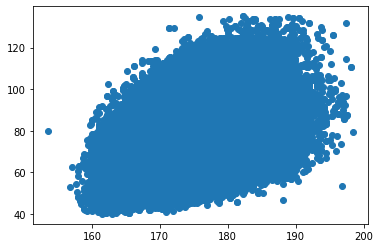

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

- 좋습니다. 그런데 다시 보니 생각보다 120킬로그램이 넘는 사람이 참 많군요?ㅎㅎ
- 히스토그램도 확인해보겠습니다.

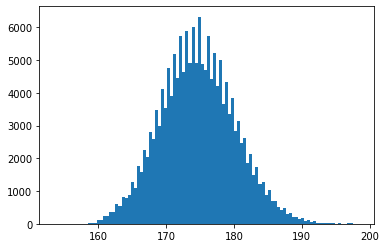

In [21]:
import matplotlib.pyplot as plt
plt.hist(x, bins = 100)
plt.show()

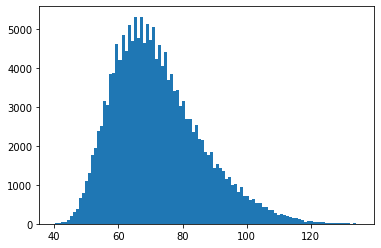

In [22]:
import matplotlib.pyplot as plt
plt.hist(y, bins = 100)
plt.show()

- 키는 정확히 정규분포를 이루고 있고, 몸무게는 조금 비대칭인 것을 볼 수 있네요.
- 이어서 박스플랏을 그려서 다시 분포를 살펴보겠습니다.

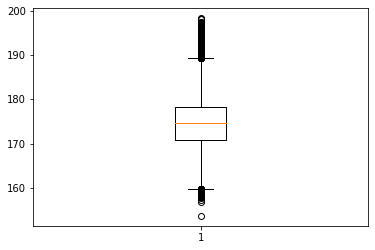

In [23]:
plt.boxplot(x)
plt.show()

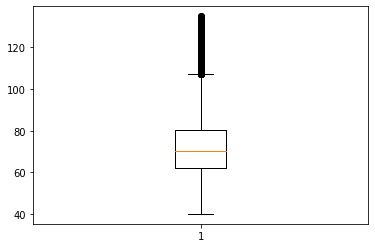

In [24]:
plt.boxplot(y)
plt.show()

- 키는 175정도가 중위값이고, 몸무게는 70 정도가 중위값인 것 같아보입니다.
- 자 데이터는 전반적으로 잘 살펴보았으니 이제 본격적으로 w와 b값을 찾아보겠습니다.

In [25]:
# 몸무게 = (키 - 100) * 0.9
# 몸무게 = 키 * 0.9 - 90
w = 0.9
b = -90

- 일반적으로 키에서 100을 뺀 후, 거기에서 0.9를 곱하면 된다는 이야기 들어보셨나요?
- 그 식을 전개하면 w가 0.9, b가 -90이 나오네요.
- 이 식으로 예측선을 그려보겠습니다.

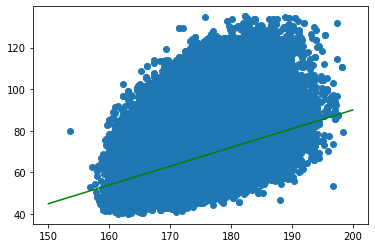

In [26]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot([150, 200], [150 * w + b,200 * w + b], 'g')
plt.show()

- 꽤 그럴 듯해보이는 직선이 그려졌네요. 이제 이 직선을 기반으로 경사하강법을 적용하여 w와 b를 찾아보겠습니다.

### 3. 경사하강법으로 w와 b값 업데이트하기
- 아래 식 기억 나시죠?
$$\hat{y}  = w * x[i] + b$$  
- 예측값 = 가중치 x 데이터(x[i]) + 편향 이라는 의미였죠.
- 그런데 변수이름은 y_hat 대신 y2라고 쓰겠습니다.

- 맨 앞의 데이터로 테스트를 해보겠습니다.
- x[0] 데이터의 값은 185.5입니다.
- 부럽네요..ㅠㅠ

In [27]:
x[0]

185.5

- 이제 이 분의 몸무게를 기존의 방법으로 예측해보겠습니다.

In [28]:
y2 = w * x[0] + b
y2

76.95000000000002

- 예측 결과는 77킬로그램 정도가 나오는군요?
- 원래 이 분의 몸무게를 확인해보고, 기존의 방법으로 예측한 오차를 확인해보겠습니다.

In [29]:
y[0]

73.2

In [30]:
y[0] - y2

-3.750000000000014

- 3.7킬로그램 정도 밖에 차이가 안나네요! 우리가 새로운 방법을 만들어서 더 나아질까요?ㅎㅎ
- 우리는 경사하강법과 딥러닝의 업데이트 방법을 이해하기 위해서 하고 있으니 안나아져도 괜찮습니다..ㅠㅠ

- 이어지는 식은 w값을 업데이트하는 식이었습니다.
- w = w + err * x[0] 였죠? 그럼 업데이트된 w값과 b값을 확인해보겠습니다.

In [31]:
w = w + (y[0] - y2) * x[0]
w

-694.7250000000026

In [32]:
b = b + (y[0] - y2)
b

-93.75000000000001

- 와우..w값이 엄청 음으로 커졌네요..
- 그래프로 다시 그려보겠습니다.

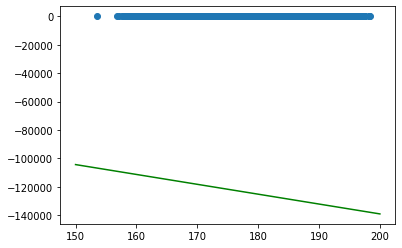

In [33]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot([150, 200], [150 * w + b,200 * w + b], 'g')
plt.show()

- 아주 이상한 값이 나와버렸네요..
- 사실 그래서 두 가지 처리를 해주겠습니다.

### Data Normalization(데이터 정규화)  
- 딥러닝에 들어가는 데이터는 보통 0과 1사이의 숫자로 바꿔줍니다.
- 여기에서는 (x - 150) / 100을 해주면 더 좋겠지만, 그러면 키와 몸무게 느낌이 사라집니다.  
  그래서 여기에서는 키와 몸무게에 모두 100을 나눠주는 정도로 정규화를 하겠습니다.
- 그리고 w값은 비율이니 그대로 두고, b값은 100으로 나눠서 진행하겠습니다.

In [34]:
w = 0.9
b = -0.9

x = x/100
y = y/100

- x와 y 값을 확인해보니 1.xx, 0.xx로 값이 작아진 것을 볼 수 있습니다.

In [35]:
x

array([1.855, 1.672, 1.799, ..., 1.752, 1.736, 1.758])

In [36]:
y

array([0.732, 0.651, 0.932, ..., 0.787, 0.574, 0.517])

### Learning rate(학습률)
- 여기에 경사하강법 수업에서 잠시 배웠던 학습률을 적용하겠습니다.
- 보통 학습률은 0.001 정도로 준다고 해서 우리도 그렇게 적용해보겠습니다.  
  참고로, 우리는 계산 편의를 위해 소수점 이하 20자리로 숫자를 반올림합니다.

In [37]:
for i in range(len(x)) :
  y2 = x[i] * w + b
  err = y[i] - y2
  w = round(w + 0.001 * err * x[i], 20)
  b = round(b + 0.001 * err, 20)
print(w,b)

0.9382584562410033 -0.8999440802491729


- 결과를 확인해보니 w가 0.94 정도이고 b값은 거의 0.9에 가깝습니다.
- 그래프로 다시 확인해보겠습니다.

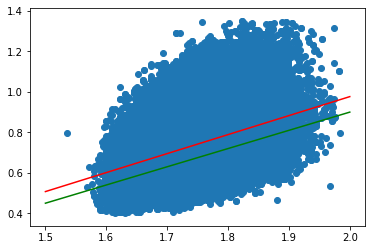

In [38]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot([1.5, 2.0], [1.5 * w + b, 2.0 * w + b], 'r') # 업데이트된 예측선
plt.plot([1.5, 2.0], [1.5 * 0.9 - 0.9, 2.0 * 0.9 - 0.9], 'g') # 기존 방식으로 그린 예측선
plt.show()

- 큰 차이가 없지만 사실 조금 나아진 것 같습니다.
- 이제 더 반복해보겠습니다. 시간관계상 4번만 더 반복해봅니다.  
  아까 1사이클 반복했기 때문에 사실 5사이클을 반복한 것입니다.

In [39]:
for j in range(4) : 
  for i in range(len(x)) :
    y2 = x[i] * w + b
    err = y[i] - y2
    w = round(w + 0.001 * err * x[i], 20)
    b = round(b + 0.001 * err, 20)
print(w,b)

0.9662123477110637 -0.9488728036217774


- 조금 더 변화가 있었네요. 그래프로 다시 확인해보겠습니다.

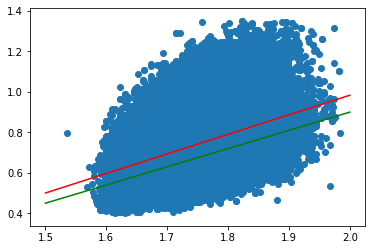

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot([1.5, 2.0], [1.5 * w + b, 2.0 * w + b], 'r') # 업데이트된 예측선
plt.plot([1.5, 2.0], [1.5 * 0.9 - 0.9, 2.0 * 0.9 - 0.9], 'g') # 기존 방식으로 그린 예측선
plt.show()

- 네. 이렇게 우리가 새로 만든 예측선, 즉 모델의 w값은 0.97 정도이고, b값은 -0.94입니다.
- 다시 환산해서 적용해보면  
  몸무게 = 키 * 0.97 - 94 정도로 계산하면 될까요?

- 이제 모델을 완성했으니 값을 예측해보겠습니다.
- 실제 데이터의 0번째, 1번째 키를 입력으로 넣고 예측 결과를 빨간색으로, 원래 정답을 초록색으로 표시하겠습니다.

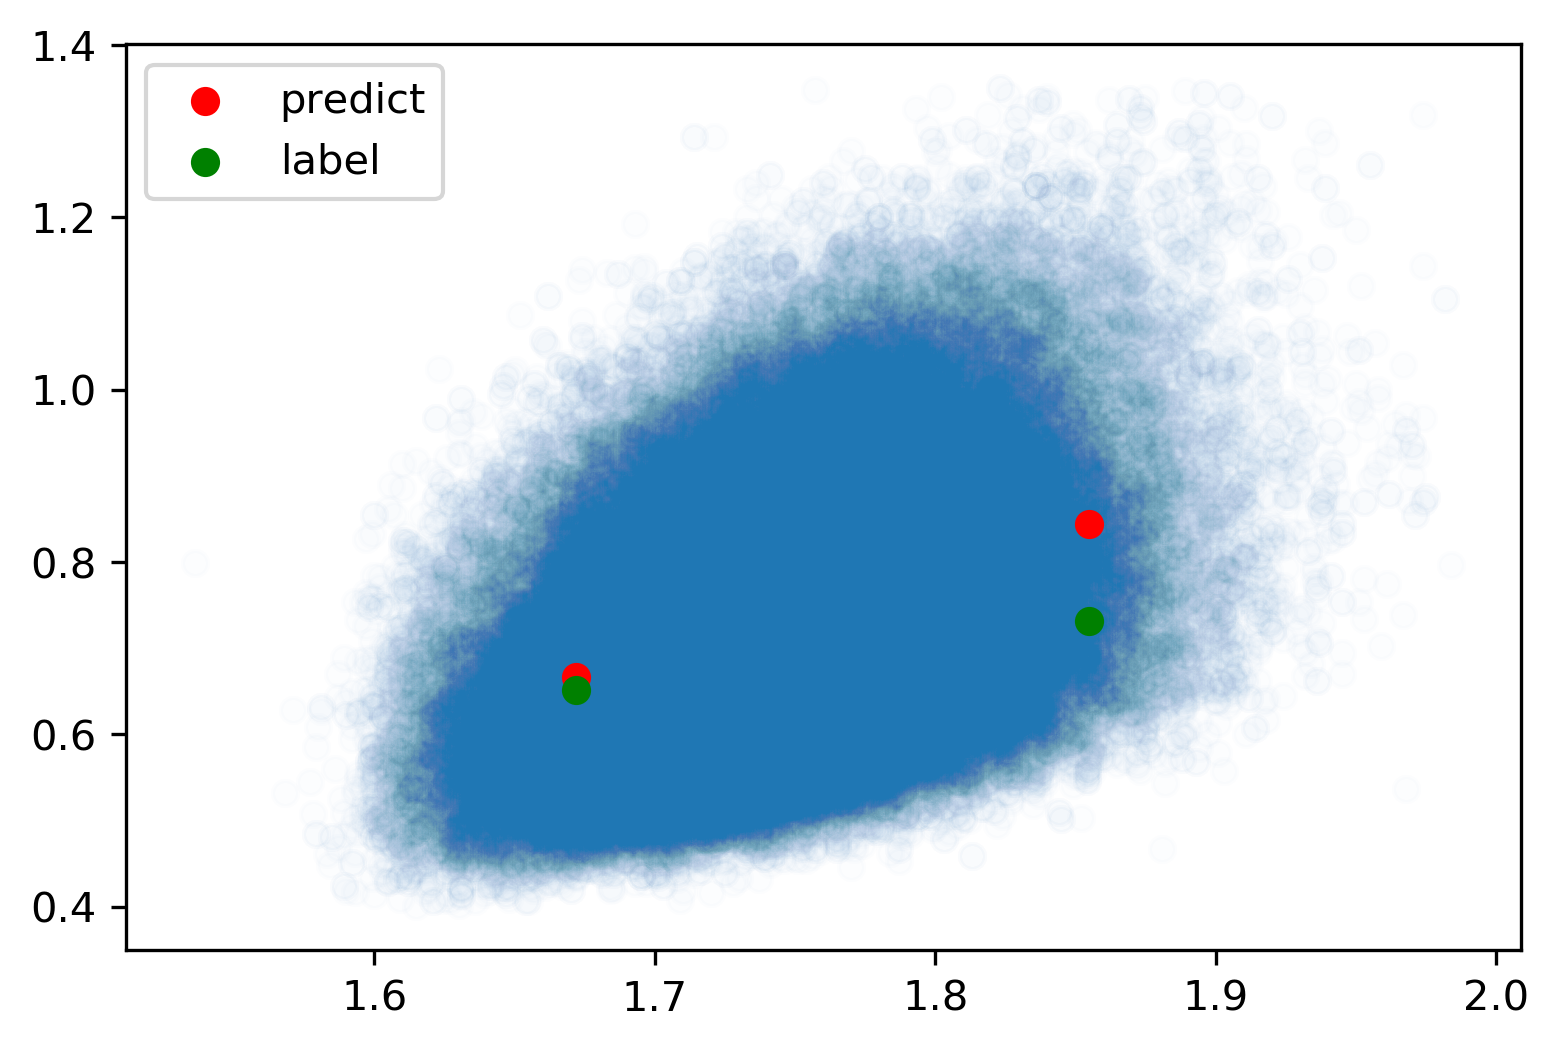

In [41]:
import numpy as np
x_test = np.array([x[0], x[1]])
y_test = np.array([y[0], y[1]])
y_pred = w * x_test + b
plt.figure(dpi=300)
plt.scatter(x, y, alpha = 0.01)
plt.scatter(x_test, y_pred, color = 'r', label = 'predict')
plt.scatter(x_test, y_test, color = 'g', label = 'label')
plt.legend()
plt.show()

- 결과를 확인해보니 오른쪽 분은 평균보다 많이 마르셨고, 왼쪽 분은 평균과 비슷하시다는 것을 확인할 수 있었습니다.

### 4. 마무리
- 이것으로 신체검사 데이터를 활용해서 새로운 키 - 몸무게 모델 만들기 프로젝트를 모두 마치겠습니다.  
- 이어지는 강의에서는 텐서플로(케라스) 라이브러리를 활용해서 조금 더 쉽게 프로젝트를 진행하겠습니다.  
- 하지만 이번 강의에서 함께 구현한 이 코드들의 개념을 이해하는 것은 매우 중요한 일이었답니다.
- 수고 많으셨어요!! :)